# 10.5.1 K-Means Clustering

Load modules and data

In [529]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.cluster import KMeans
import itertools
import time
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

USArrests = pd.read_csv('USArrests.csv')

### Setup data set

Normalize the data set using the std

In [530]:
USArrestsNorm=( USArrests[[1, 2, 3, 4]] /  np.std(USArrests[[1, 2, 3 ,4]],axis=0) )

### Evaluate the data set

Plot the predictors against each other in 2D

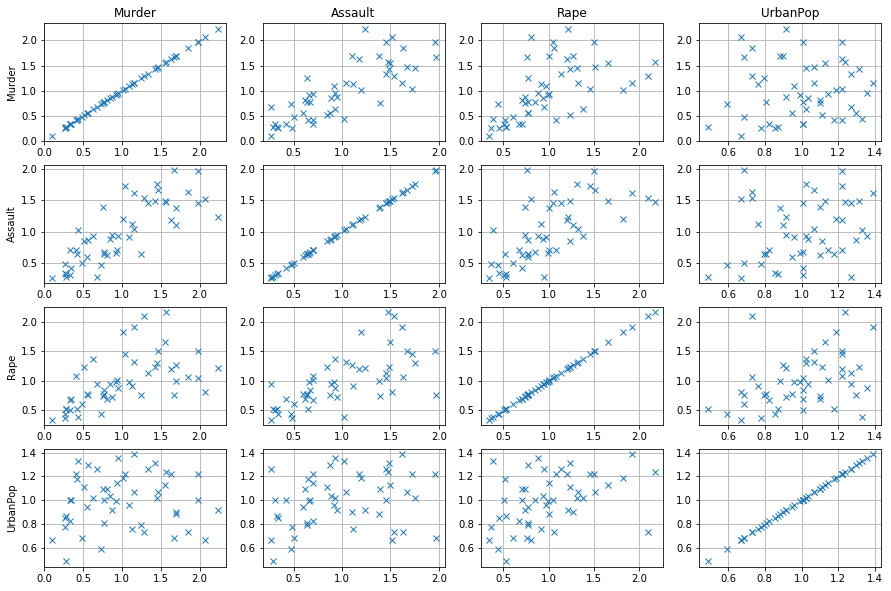

In [531]:
plt.figure(figsize=(15,10))
plt.subplot(4,4,1)
plt.plot(USArrestsNorm.Murder,USArrestsNorm.Murder,'x')
plt.title("Murder"), plt.grid(), plt.ylabel("Murder")
plt.subplot(4,4,2)
plt.plot(USArrestsNorm.Assault,USArrestsNorm.Murder,'x')
plt.title("Assault"), plt.grid()
plt.subplot(4,4,3)
plt.plot(USArrestsNorm.Rape,USArrestsNorm.Murder,'x')
plt.title("Rape"), plt.grid()
plt.subplot(4,4,4)
plt.plot(USArrestsNorm.UrbanPop,USArrestsNorm.Murder,'x')
plt.title("UrbanPop"), plt.grid()
#
plt.subplot(4,4,5)
plt.plot(USArrestsNorm.Murder,USArrestsNorm.Assault,'x'), plt.grid()
plt.ylabel("Assault")
plt.subplot(4,4,6)
plt.plot(USArrestsNorm.Assault,USArrestsNorm.Assault,'x'), plt.grid()
plt.subplot(4,4,7)
plt.plot(USArrestsNorm.Rape,USArrestsNorm.Assault,'x'), plt.grid()
plt.subplot(4,4,8)
plt.plot(USArrestsNorm.UrbanPop,USArrestsNorm.Assault,'x'), plt.grid()
#
plt.subplot(4,4,9)
plt.plot(USArrestsNorm.Murder,USArrestsNorm.Rape,'x'), plt.grid()
plt.ylabel("Rape")
plt.subplot(4,4,10)
plt.plot(USArrestsNorm.Assault,USArrestsNorm.Rape,'x'), plt.grid()
plt.subplot(4,4,11)
plt.plot(USArrestsNorm.Rape,USArrestsNorm.Rape,'x'), plt.grid()
plt.subplot(4,4,12)
plt.plot(USArrestsNorm.UrbanPop,USArrestsNorm.Rape,'x'), plt.grid()
#
plt.subplot(4,4,13)
plt.plot(USArrestsNorm.Murder,USArrestsNorm.UrbanPop,'x'), plt.grid()
plt.ylabel("UrbanPop")
plt.subplot(4,4,14)
plt.plot(USArrestsNorm.Assault,USArrestsNorm.UrbanPop,'x'), plt.grid()
plt.subplot(4,4,15)
plt.plot(USArrestsNorm.Rape,USArrestsNorm.UrbanPop,'x'), plt.grid()
plt.subplot(4,4,16)
plt.plot(USArrestsNorm.UrbanPop,USArrestsNorm.UrbanPop,'x'), plt.grid()
plt.show()

Adjust the data set using the new knowlegde

In [532]:
USArrestsNormReduced = USArrestsNorm[[0, 1, 3]]

### K-Mean Clustering

Perform mean clustering with different K-values

In [533]:
N_Centers = 20
kmeans_inertia=np.zeros((N_Centers,1))
for i in range(1,N_Centers+1):
    kmeans = KMeans(n_clusters=i,n_init=20).fit(USArrestsNormReduced)
    kmeans_inertia[i-1] = kmeans.inertia_

Plot the Elbow Curve using the sum of distances for all elements as a function of K centers

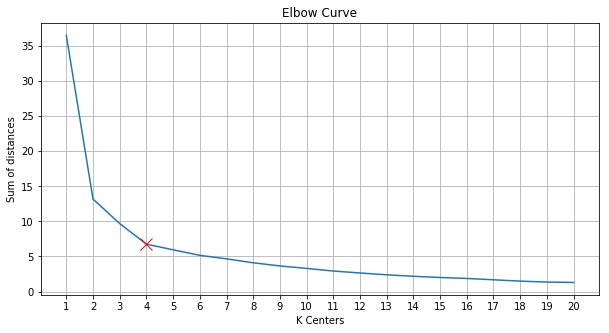

In [534]:
plt.figure(figsize=(10,5))
plt.plot(range(1,N_Centers+1),kmeans_inertia)
axis = plt.plot(4,kmeans_inertia[3], "xr",markersize=12)
plt.title("Elbow Curve"), plt.ylabel("Sum of distances"), plt.xlabel("K Centers"), plt.grid()
plt.xticks(range(1,N_Centers+1)), 
plt.show()

Perform new evaluation using selected K amount

In [535]:
N_Centers = 4
kmeans = KMeans(n_clusters=N_Centers,n_init=20).fit(USArrestsNormReduced)

Print various information to the console

In [536]:
print("Cluster centers")
print(kmeans.cluster_centers_)
print("\nSum of distance")
print(kmeans.inertia_)
print("\nCluster Labels")
print(kmeans.labels_)
print("\nCluster 0")
print(USArrests[kmeans.labels_==0][range(0,5)])
print("\nCluster 1")
print(USArrests[kmeans.labels_==1][range(0,5)])
print("\nCluster 2")
print(USArrests[kmeans.labels_==2][range(0,5)])
print("\nCluster 3")
print(USArrests[kmeans.labels_==3][range(0,5)])

Cluster centers
[[ 0.39529679  0.47393167  0.55576488]
 [ 1.75055641  1.51186851  1.12683685]
 [ 0.84594701  0.85362325  0.94557605]
 [ 1.29686697  1.53013419  1.8032081 ]]

Sum of distance
6.76048443253

Cluster Labels
[1 3 3 2 3 3 0 2 1 1 0 0 1 2 0 2 2 1 0 1 2 3 0 1 2 2 0 3 0 2 3 1 1 0 2 2 2
 2 0 1 0 1 1 2 0 2 2 0 0 2]

Cluster 0
       Unnamed: 0  Murder  Assault  UrbanPop  Rape
6     Connecticut     3.3      110        77  11.1
10         Hawaii     5.3       46        83  20.2
11          Idaho     2.6      120        54  14.2
14           Iowa     2.2       56        57  11.3
18          Maine     2.1       83        51   7.8
22      Minnesota     2.7       72        66  14.9
26       Nebraska     4.3      102        62  16.5
28  New Hampshire     2.1       57        56   9.5
33   North Dakota     0.8       45        44   7.3
38   Rhode Island     3.4      174        87   8.3
40   South Dakota     3.8       86        45  12.8
44        Vermont     2.2       48        32  11.2
47 

Plot the features grahipcally to illustrate the clusters found

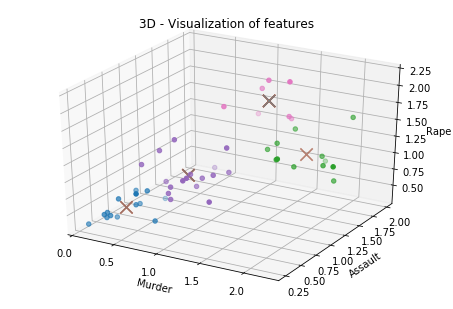

In [537]:
fig = plt.figure()
ax = Axes3D(fig)
for i in range(1,N_Centers+1):
    ax.scatter(USArrestsNormReduced.Murder[kmeans.labels_==i-1], USArrestsNormReduced.Assault[kmeans.labels_==i-1], USArrestsNormReduced.Rape[kmeans.labels_==i-1])
    ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2],s=150,marker="x")
ax.set_xlabel("Murder"), ax.set_ylabel("Assault"), ax.set_zlabel("Rape"), 
ax.set_title("3D - Visualization of features")
plt.show()